EJEMPLO: Gaussian Mixture Clustering

In [2]:
import numpy as np
import pandas as pd
from pickle import dump, load
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs


## a) Datos obtenidos tras el feature selection

In [31]:
X_train = pd.read_csv('../Samples/Clean/Feature_Selection/X_train.csv')
X_test = pd.read_csv('../Samples/Clean/Feature_Selection/X_test.csv')
y_train = pd.read_csv('../Samples/Clean/Feature_Selection/Y_train.csv')
y_test = pd.read_csv('../Samples/Clean/Feature_Selection/Y_test.csv')

In [3]:
#Convertir el DataFrame completo a un array NumPy
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Crear y ajustar el modelo de Gaussian Mixture
n_components = 87  # Especificar el número de componentes (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train_array)

GaussianMixture(n_components=87, random_state=42)

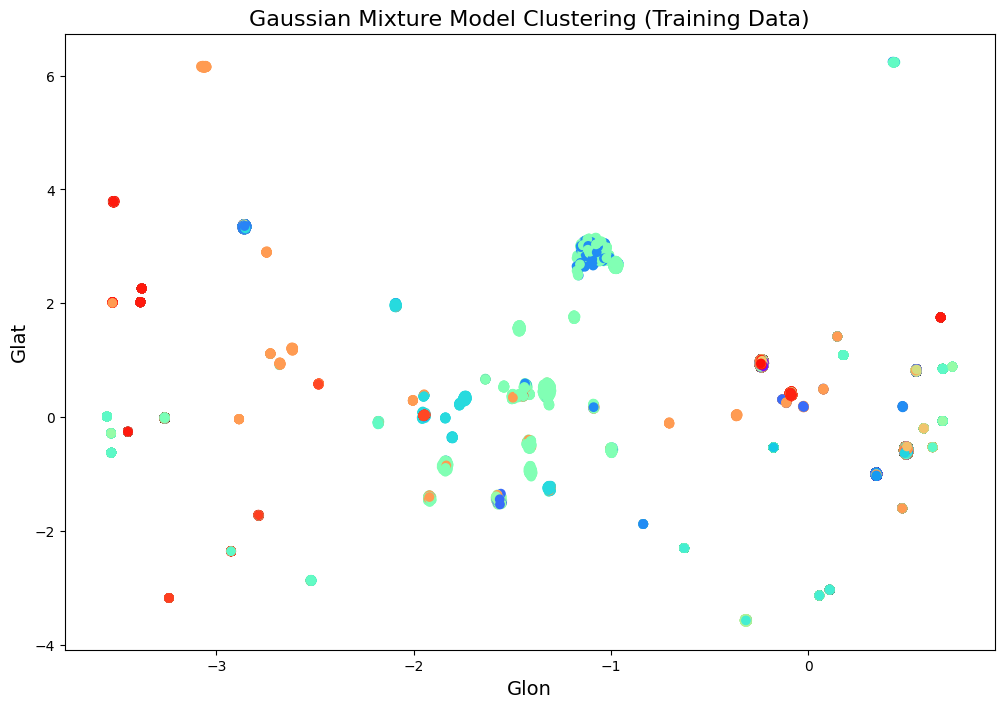

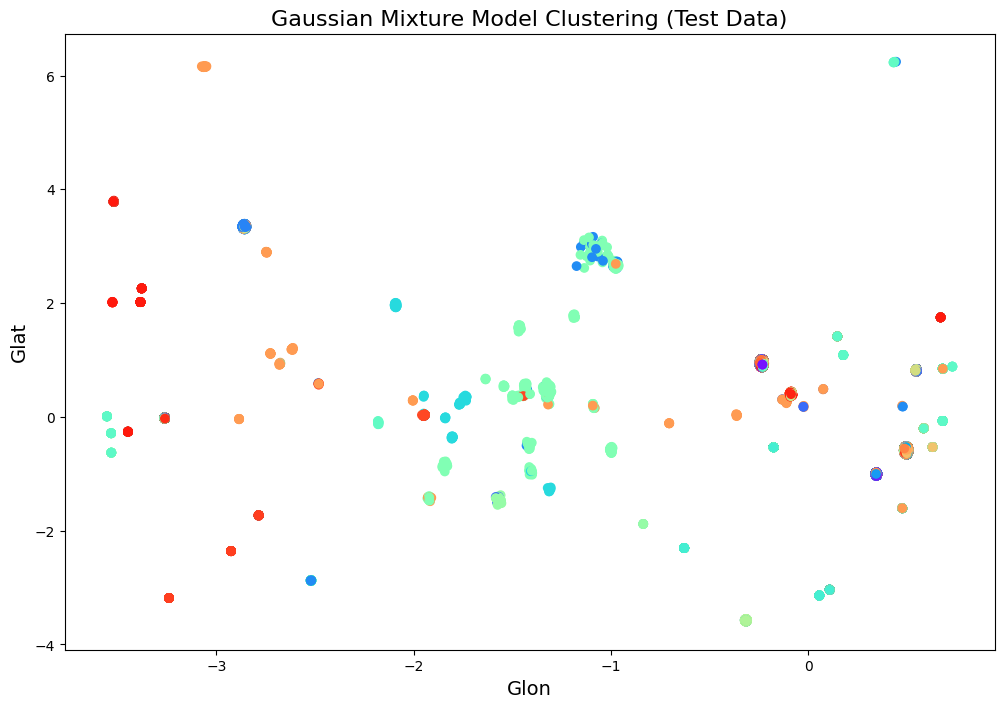

In [5]:

# Predecir etiquetas para los datos de entrenamiento
y_predict_train = gmm.predict(X_train_array)

# Predecir etiquetas para los nuevos datos
y_predict_test = gmm.predict(X_test_array)

# Obtener los valores de "Glon" y "Glat"
X_train_glon_glat = X_train[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]
X_test_glon_glat = X_test[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]


# Visualizar los resultados en los datos de entrenamiento
plt.figure(figsize=(12, 8))
plt.scatter(X_train_array[:, 0], X_train_array[:, 1], c=y_predict_train, cmap='rainbow', marker='o')
plt.title('Gaussian Mixture Model Clustering (Training Data)', fontsize=16)
plt.xlabel('Glon', fontsize=14)
plt.ylabel('Glat', fontsize=14)
plt.show()

# Visualizar los resultados en los nuevos datos
plt.figure(figsize=(12, 8))
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_predict_test, cmap='rainbow', marker='o')
plt.title('Gaussian Mixture Model Clustering (Test Data)', fontsize=16)
plt.xlabel('Glon', fontsize=14)
plt.ylabel('Glat', fontsize=14)
plt.show()

In [32]:
# Unir y_test y y_predict_test con X_test
X_test_with_y_test = X_test.copy()
X_test_with_y_test['y_test'] = y_test.to_numpy().ravel()
X_test_with_y_predict_test = X_test.copy()
X_test_with_y_predict_test['y_predict_test'] = y_predict_test

In [33]:
dump(gmm, open("../Models/Gaussianmixture.pkl", "wb"))
X_test_with_y_test.to_csv('../Samples/Clean/Testing/Gaussianmixture/test.csv', index=False)
X_test_with_y_predict_test.to_csv('../Samples/Clean/Testing/Gaussianmixture/predict.csv', index=False)

In [34]:
X_test_with_y_test.columns

Index(['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'PM', 'pmRA', 'pmDE',
       'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor',
       'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor',
       'NAL', 'NgAL', 'Nper', 'MatchObs', 'o_Gmag', 'e_FG', 'o_BPmag', 'e_FBP',
       'o_RPmag', 'e_FRP', 'NBPblend', 'NRPblend', 'BP-RP', 'BP-G', 'G-RP',
       'PSS', 'angDist', 'B-R', 'Dist', 'y_test'],
      dtype='object')

Comprobación gráfica

In [13]:
X_test_with_y_test = pd.read_csv('../Samples/Clean/Testing/Gaussianmixture/test.csv')
X_test_with_y_predict_test = pd.read_csv('../Samples/Clean/Testing/Gaussianmixture/predict.csv')

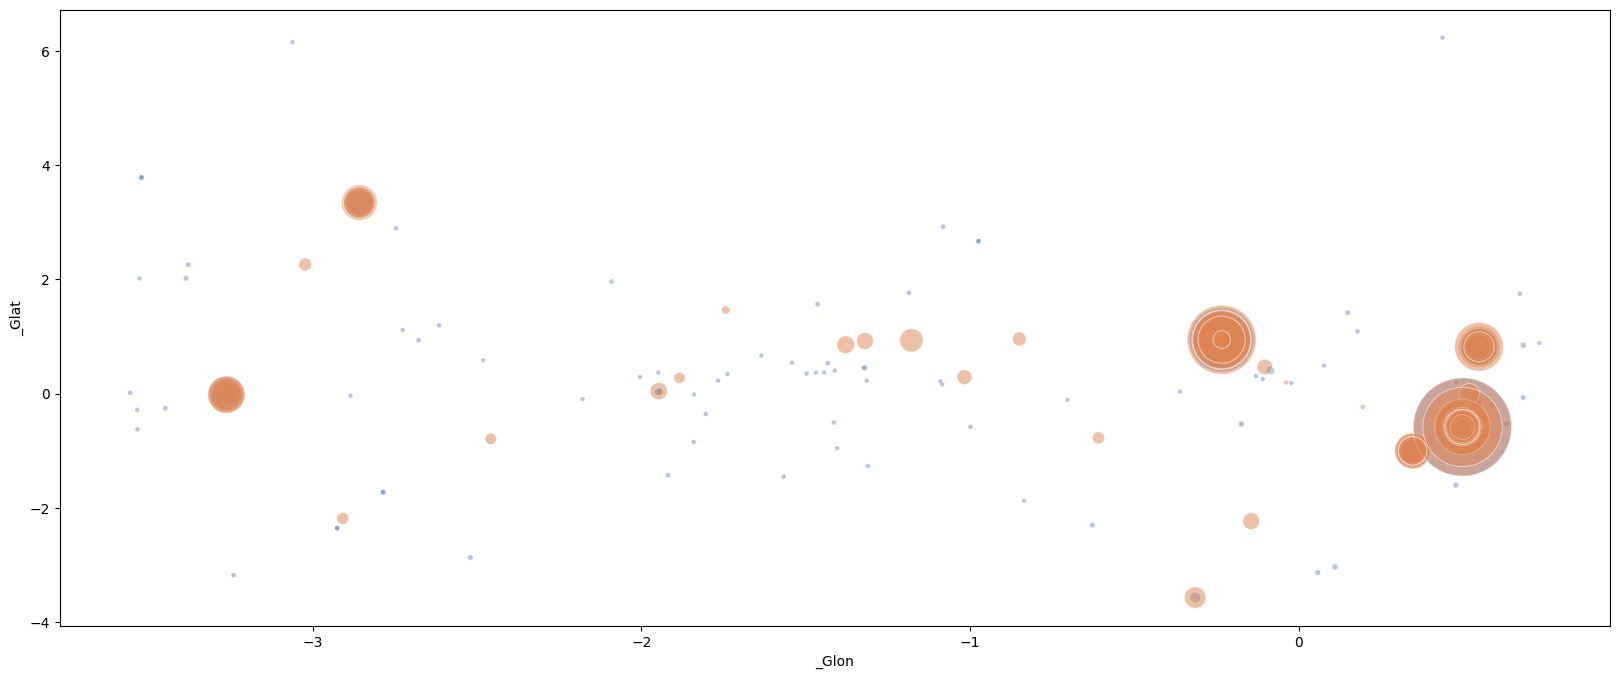

In [14]:
from tools import graphic_tester
graphic_tester(X_test_with_y_test, X_test_with_y_predict_test, 'y_test', 'y_predict_test', '_Glon', '_Glat')

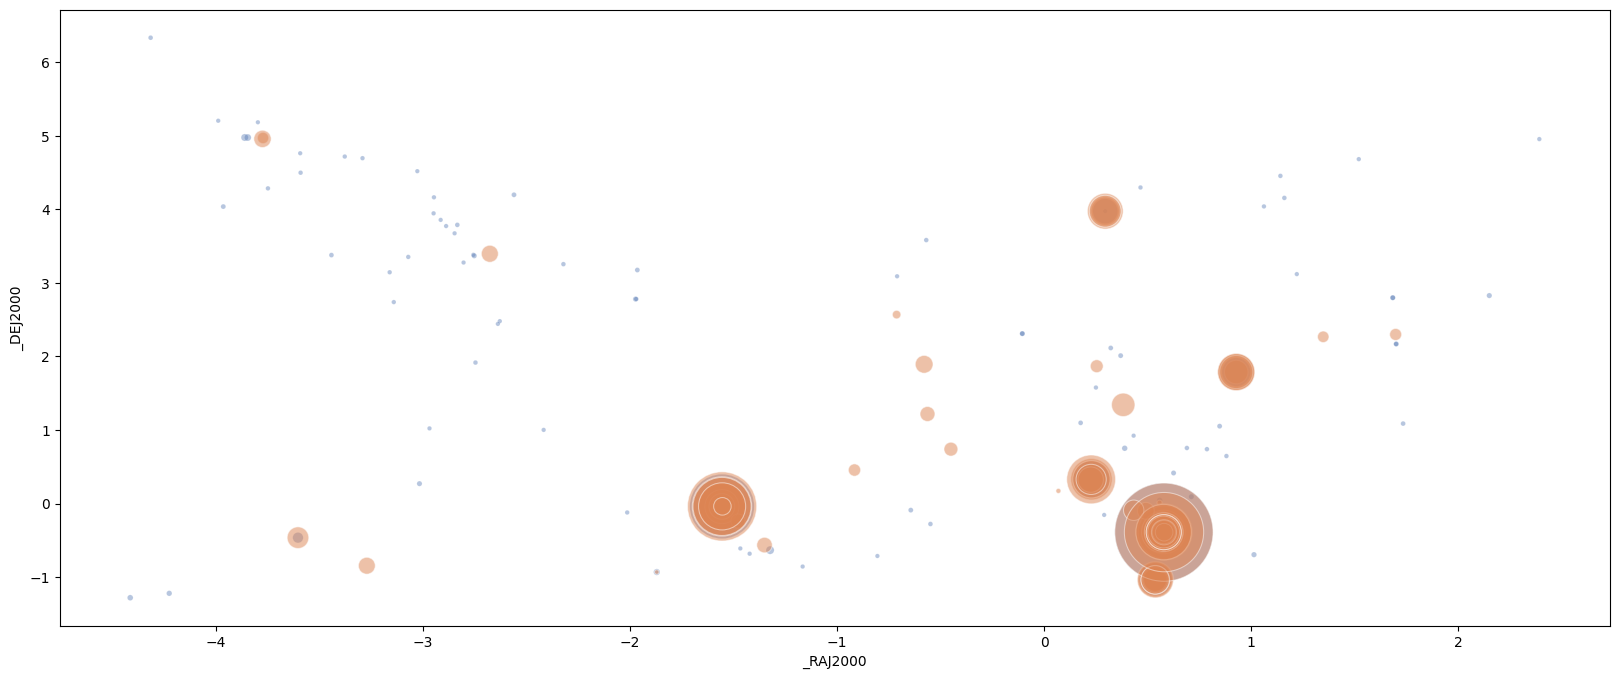

In [15]:
graphic_tester(X_test_with_y_test, X_test_with_y_predict_test, 'y_test', 'y_predict_test', '_RAJ2000', '_DEJ2000')

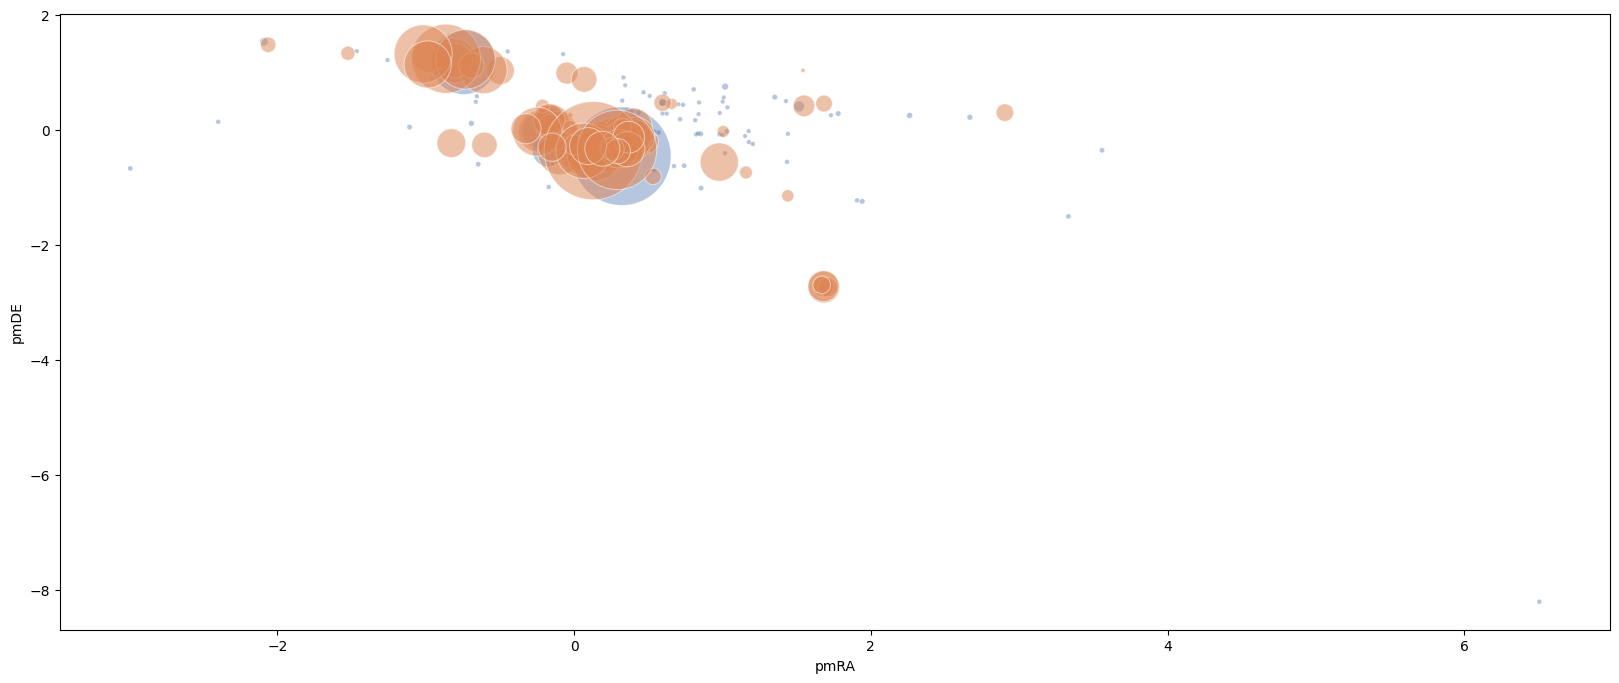

In [16]:
graphic_tester(X_test_with_y_test, X_test_with_y_predict_test, 'y_test', 'y_predict_test', 'pmRA', 'pmDE')

## b) Datos obtenidos tras el human feature selection

In [3]:
X_train_human = pd.read_csv('../Samples/Clean/Feature_Selection/X_train_human.csv')
X_test_human = pd.read_csv('../Samples/Clean/Feature_Selection/X_test_human.csv')
Y_train_human = pd.read_csv('../Samples/Clean/Feature_Selection/Y_train_human.csv')
Y_test_human = pd.read_csv('../Samples/Clean/Feature_Selection/Y_test_human.csv')

In [4]:
X_train_human.columns

Index(['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'Plx', 'pmRA', 'pmDE', 'FG',
       'Gmag', 'FBP', 'BPmag', 'FRP', 'RPmag', 'B-R', 'BP-RP', 'BP-G', 'G-RP',
       'MG', 'angDist', 'Dist'],
      dtype='object')

In [5]:
#Convertir el DataFrame completo a un array NumPy
X_train_human_array = X_train_human.to_numpy()
X_test_human_array = X_test_human.to_numpy()

# Crear y ajustar el modelo de Gaussian Mixture
n_components = 87  # Especificar el número de componentes (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_train_human_array)

GaussianMixture(n_components=87, random_state=42)

In [6]:
# Predecir etiquetas para los datos de entrenamiento
y_predict_train_human = gmm.predict(X_train_human_array)

# Predecir etiquetas para los nuevos datos
y_predict_test_human = gmm.predict(X_test_human_array)

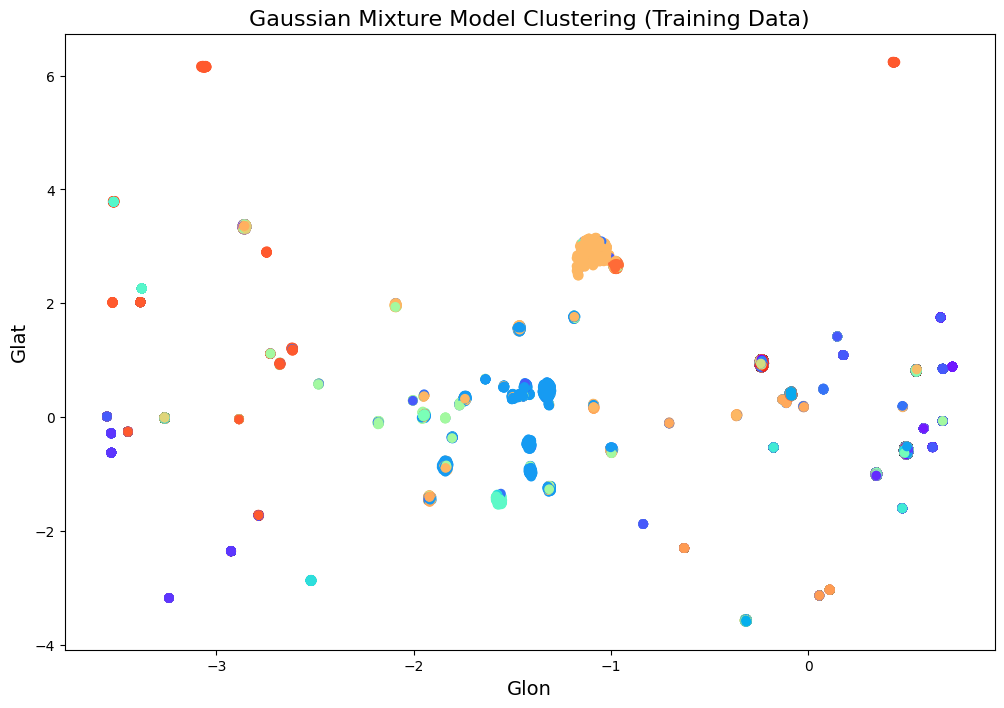

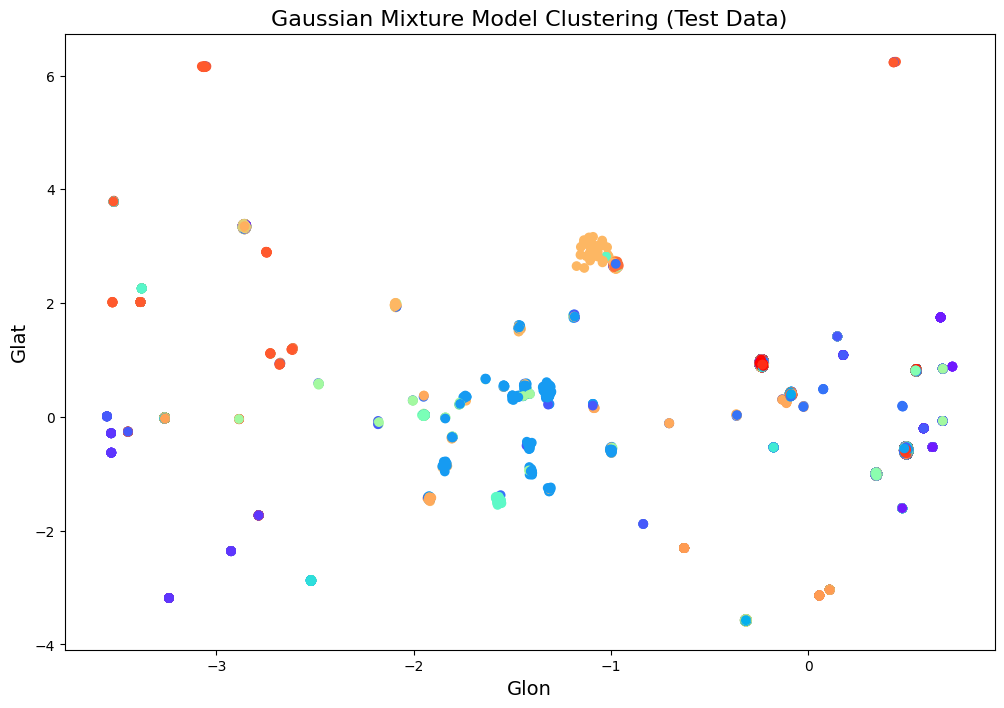

In [7]:
# Obtener los valores de "Glon" y "Glat"
X_train_human_glon_glat = X_train_human[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]
X_test_human_glon_glat = X_test_human[['_Glon', '_Glat','_RAJ2000','_DEJ2000','Dist']]


# Visualizar los resultados en los datos de entrenamiento
plt.figure(figsize=(12, 8))
plt.scatter(X_train_human_array[:, 0], X_train_human_array[:, 1], c=y_predict_train_human, cmap='rainbow', marker='o')
plt.title('Gaussian Mixture Model Clustering (Training Data)', fontsize=16)
plt.xlabel('Glon', fontsize=14)
plt.ylabel('Glat', fontsize=14)
plt.show()

# Visualizar los resultados en los nuevos datos
plt.figure(figsize=(12, 8))
plt.scatter(X_test_human_array[:, 0], X_test_human_array[:, 1], c=y_predict_test_human, cmap='rainbow', marker='o')
plt.title('Gaussian Mixture Model Clustering (Test Data)', fontsize=16)
plt.xlabel('Glon', fontsize=14)
plt.ylabel('Glat', fontsize=14)
plt.show()

In [8]:
# Unir y_test y y_predict_test con X_test
X_test_with_y_test_human = X_test_human.copy()
X_test_with_y_test_human['y_test_human'] = Y_test_human.to_numpy().ravel()
X_test_with_y_predict_test_human = X_test_human.copy()
X_test_with_y_predict_test_human['y_predict_test_human'] = y_predict_test_human

In [9]:
dump(gmm, open("../Models/Gaussianmixture-human.pkl", "wb"))
X_test_with_y_test_human.to_csv('../Samples/Clean/Testing/Gaussianmixture/test_human.csv', index=False)
X_test_with_y_predict_test_human.to_csv('../Samples/Clean/Testing/Gaussianmixture/predict_human.csv', index=False)

In [10]:
X_test_with_y_test_human.columns

Index(['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'Plx', 'pmRA', 'pmDE', 'FG',
       'Gmag', 'FBP', 'BPmag', 'FRP', 'RPmag', 'B-R', 'BP-RP', 'BP-G', 'G-RP',
       'MG', 'angDist', 'Dist', 'y_test_human'],
      dtype='object')

Comprobación gráfica

In [11]:
X_test_with_y_test_human = pd.read_csv('../Samples/Clean/Testing/Gaussianmixture/test_human.csv')
X_test_with_y_predict_test_human = pd.read_csv('../Samples/Clean/Testing/Gaussianmixture/predict_human.csv')

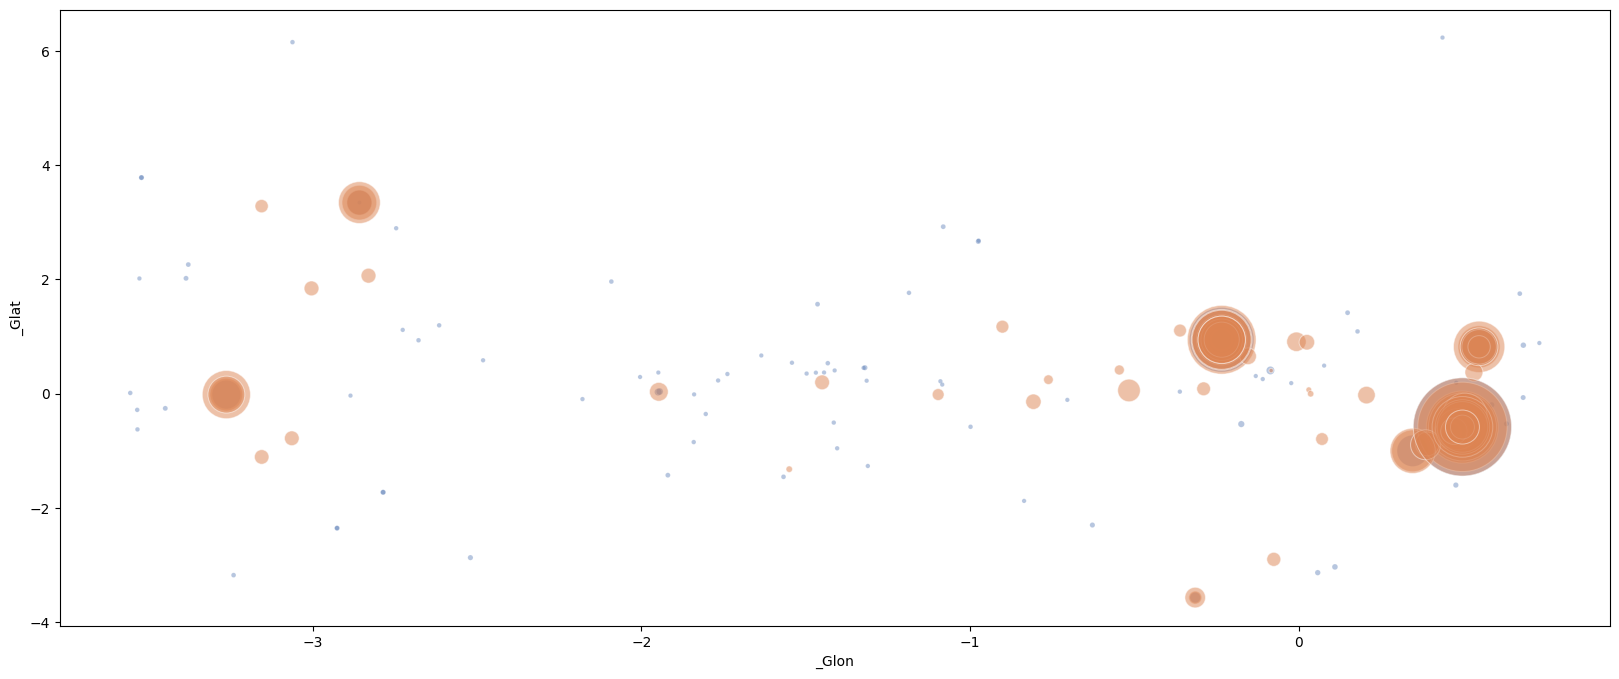

In [12]:
from tools import graphic_tester
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', '_Glon', '_Glat')

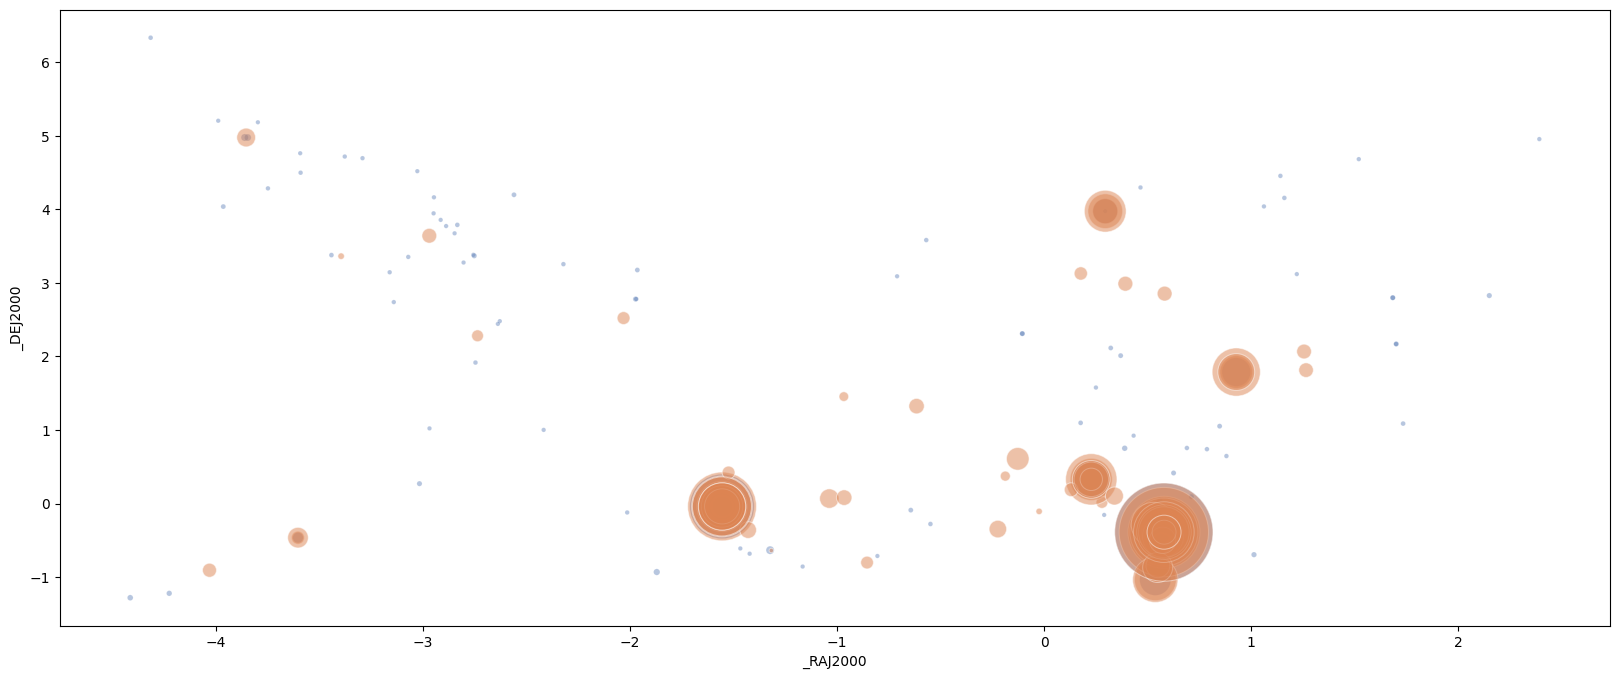

In [13]:
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', '_RAJ2000', '_DEJ2000')

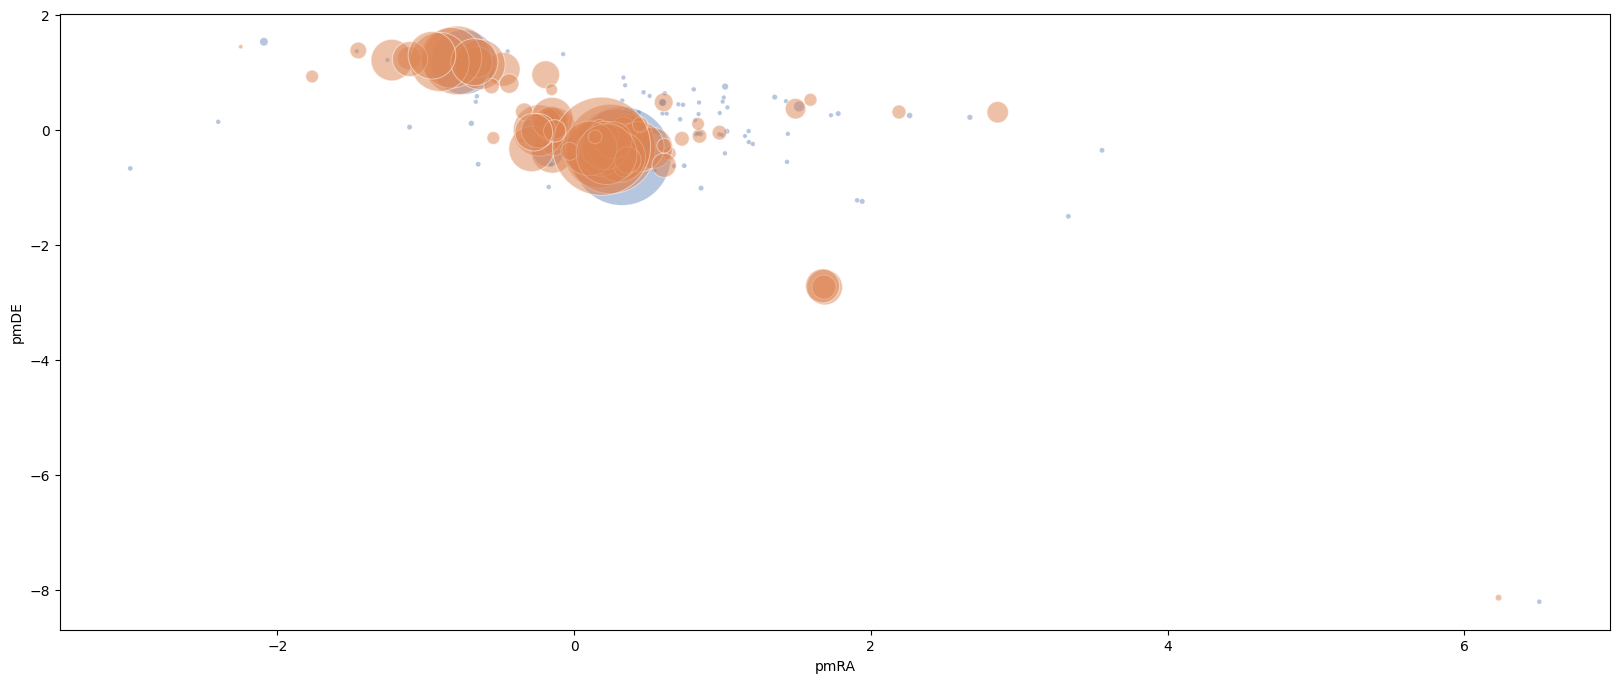

In [14]:
graphic_tester(X_test_with_y_test_human, X_test_with_y_predict_test_human, 'y_test_human', 'y_predict_test_human', 'pmRA', 'pmDE')